In [ ]:
'''
1- load the point clouds as spherical coordinates with shape [rho theta phi]
2- rho between 0 and 5 (meters)
3- theta between -180 and 180 (degree = 360/61)
4- phi between 75 and 100 (degree = 5)
'''
import numpy as np
save_path = "PATH\\TO\\sph_point_cloud.npy"
sph_point_cloud = np.load(save_path)

In [2]:
sph_point_cloud

array([[   3.98440133, -162.29508197,   80.        ],
       [   4.55450241,  138.68852459,   80.        ],
       [   3.98440133, -162.29508197,   80.        ],
       [   3.88867705, -156.39344262,   80.        ],
       [   3.88867705, -156.39344262,   80.        ],
       [   4.5259453 ,  132.78688525,   80.        ],
       [   4.5545082 ,  138.68852459,   80.        ],
       [   4.5545082 ,  138.68852459,   80.        ],
       [   4.48358719, -168.19672131,   85.        ],
       [   3.60584462, -162.29508197,   85.        ],
       [   3.92253341, -150.49180328,   85.        ],
       [   4.44219246, -144.59016393,   85.        ],
       [   4.02516345,  -44.26229508,   85.        ],
       [   3.38479993,  -26.55737705,   85.        ],
       [   3.31331165,  -20.6557377 ,   85.        ],
       [   3.24564098,  -14.75409836,   85.        ],
       [   3.21405693,   -8.85245902,   85.        ],
       [   3.25418874,    2.95081967,   85.        ],
       [   3.32808355,    8.

### Background Noise Generation

In [36]:
import numpy as np

severity_level = 4 
severity = [45,40,35,30,20][severity_level]

planar_degree = 360/61

np.random.seed(42) 
rhos = np.random.uniform(0.5,4.5,round(sph_point_cloud.shape[0]//severity))
theta = np.random.choice(np.arange(-180,180,planar_degree),round(sph_point_cloud.shape[0]//severity))
phi = np.random.choice(np.arange(75,101,5),round(sph_point_cloud.shape[0]//severity))

# check if the rhos that are on the same theta are less than the original point clouds
for i, (rho_new, theta_new, phi_new) in enumerate(zip(rhos, theta, phi)):
    matching_indices = np.where(sph_point_cloud[:, 1] == theta_new)[0]
    if len(matching_indices) > 0:
        for idx in matching_indices:
            if rho_new >= sph_point_cloud[idx, 0]:
                rhos[i] = np.random.uniform(0, sph_point_cloud[idx, 0])
                break
            
# Add the new points to the originl point clouds
sph_point_cloud_background = sph_point_cloud.copy()
sph_point_cloud_background = np.append(sph_point_cloud_background, np.column_stack((rhos, theta, phi)),axis=0)

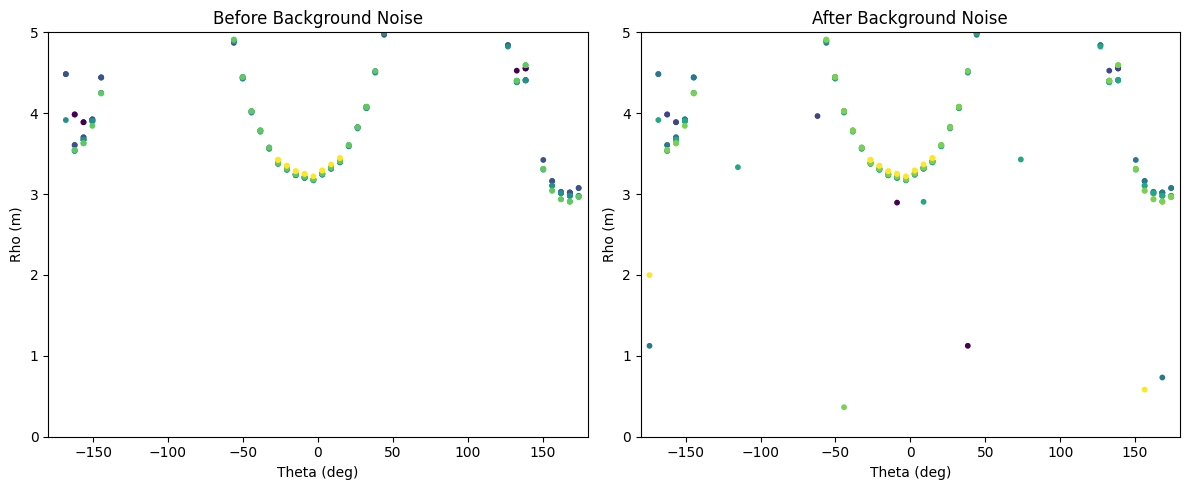

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Before Background Noise
axs[0].scatter(sph_point_cloud[:, 1], sph_point_cloud[:, 0], c=sph_point_cloud[:, 2], cmap='viridis', s=10)
axs[0].set_title('Before Background Noise')
axs[0].set_xlabel('Theta (deg)')
axs[0].set_ylabel('Rho (m)')
axs[0].set_xlim([-180, 180])
axs[0].set_ylim([0, 5])

# After Background Noise
axs[1].scatter(sph_point_cloud_background[:, 1], sph_point_cloud_background[:, 0], c=sph_point_cloud_background[:, 2], cmap='viridis', s=10)
axs[1].set_title('After Background Noise')
axs[1].set_xlabel('Theta (deg)')
axs[1].set_ylabel('Rho (m)')
axs[1].set_xlim([-180, 180])
axs[1].set_ylim([0, 5])

plt.tight_layout()
plt.show()

### Zero-range Background Noise Generation

In [41]:
severity_level = 4 
severity = [1,2,3,4,5][severity_level]

# Generate the new points
np.random.seed(42)
planar_degree = 360/61 
rhos = np.zeros(severity)  # Set rhos to always be 0
theta = np.random.choice(np.arange(-180, 180, planar_degree), severity, replace=False)
phi = np.random.choice(np.arange(75, 101, 5), severity, replace=False)

# Add the new points to the original point clouds
sph_point_cloud_corrupted = sph_point_cloud.copy()
sph_point_cloud_corrupted = np.append(sph_point_cloud_corrupted, np.column_stack((rhos, theta, phi)), axis=0)

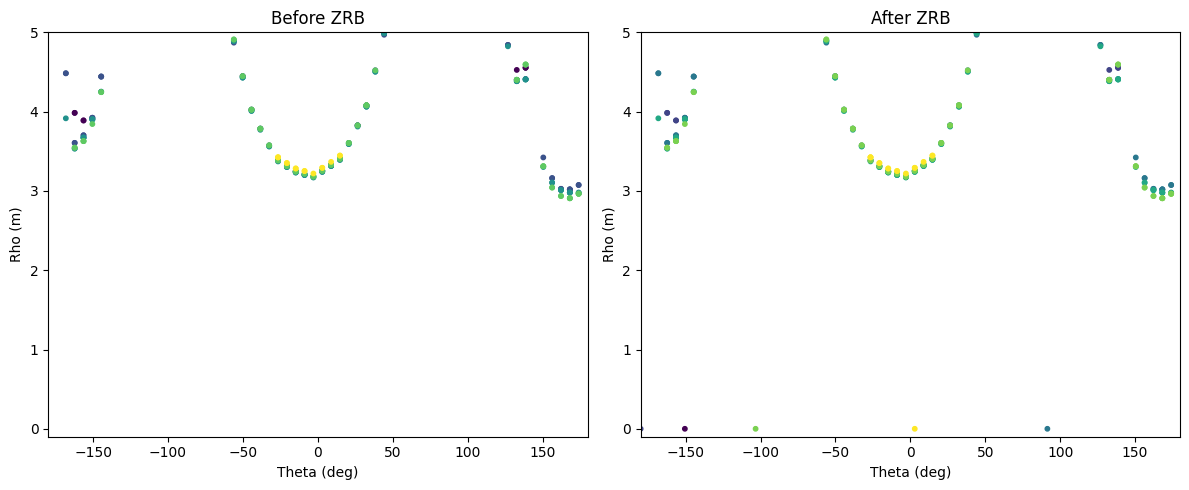

In [42]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Before ZRB
axs[0].scatter(sph_point_cloud[:, 1], sph_point_cloud[:, 0], c=sph_point_cloud[:, 2], cmap='viridis', s=10)
axs[0].set_title('Before ZRB')
axs[0].set_xlabel('Theta (deg)')
axs[0].set_ylabel('Rho (m)')
axs[0].set_xlim([-180, 180])
axs[0].set_ylim([-0.1, 5])

# After ZRB
axs[1].scatter(sph_point_cloud_corrupted[:, 1], sph_point_cloud_corrupted[:, 0], c=sph_point_cloud_corrupted[:, 2], cmap='viridis', s=10)
axs[1].set_title('After ZRB')
axs[1].set_xlabel('Theta (deg)')
axs[1].set_ylabel('Rho (m)')
axs[1].set_xlim([-180, 180])
axs[1].set_ylim([-0.1, 5])

plt.tight_layout()
plt.show()

### Occlusion Generation

In [43]:
severity_level = 4 
severity = [2,3,4,5,6][severity_level]

planar_degree = 360/61 
theta = np.arange(-180, 180, planar_degree)  
np.random.seed(42) 

# The chosen theta angle should have point clouds, otherwise it will not be occluded
theta = np.array([t for t in theta if t in sph_point_cloud[:, 1]])
theta = np.unique(theta)  # Ensure unique theta values
theta = np.random.choice(theta, severity, replace=False)

# Remove all point clouds that have the same theta as generated to make occlusion has the effect in 1D 
sph_point_cloud_occluded = sph_point_cloud.copy()
sph_point_cloud_occluded = np.array([point for point in sph_point_cloud_occluded if point[1] not in theta])

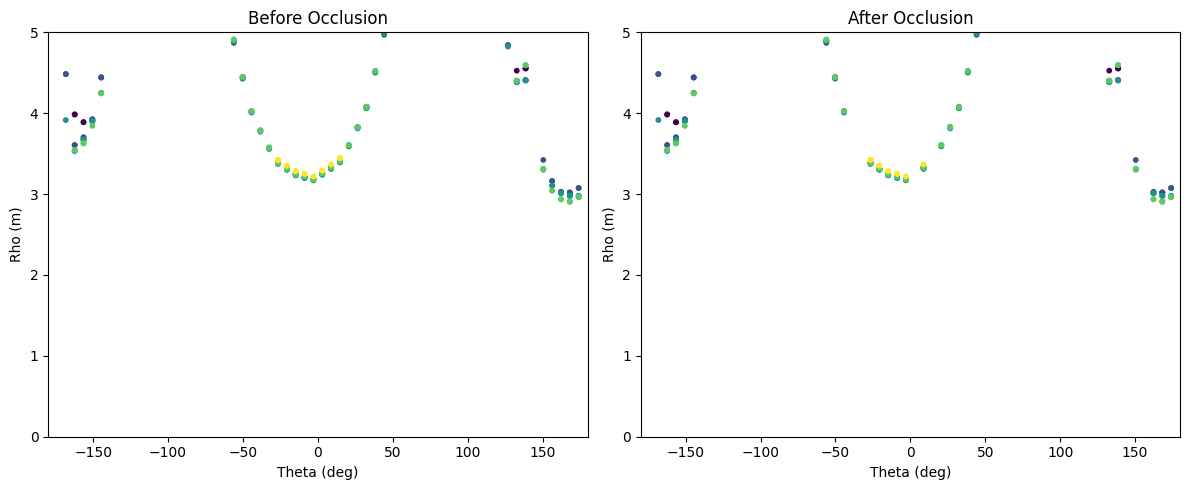

In [44]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Before Occlusion
axs[0].scatter(sph_point_cloud[:, 1], sph_point_cloud[:, 0], c=sph_point_cloud[:, 2], cmap='viridis', s=10)
axs[0].set_title('Before Occlusion')
axs[0].set_xlabel('Theta (deg)')
axs[0].set_ylabel('Rho (m)')
axs[0].set_xlim([-180, 180])
axs[0].set_ylim([0, 5])

# After Occlusion
axs[1].scatter(sph_point_cloud_occluded[:, 1], sph_point_cloud_occluded[:, 0], c=sph_point_cloud_occluded[:, 2], cmap='viridis', s=10)
axs[1].set_title('After Occlusion')
axs[1].set_xlabel('Theta (deg)')
axs[1].set_ylabel('Rho (m)')
axs[1].set_xlim([-180, 180])
axs[1].set_ylim([0, 5])

plt.tight_layout()
plt.show()

### Electromagnetic Interference Noise Generation

In [47]:
# Choose severity for noise amplitude
severity_level = 0
severity = [0.5, 1, 1.5, 2, 2.5][severity_level]

num_points = sph_point_cloud.shape[0]
np.random.seed(42) 

# Frequency and phase for the interference
freq = 615e6
cycles = 12
samples_per_cycle = 5.1
sample_rate = samples_per_cycle * freq
duration = cycles / freq
t = np.linspace(0, duration, num_points, endpoint=False)
phase_shift = np.random.uniform(0, 2 * np.pi)
sine_wave = severity * np.sin(2 * np.pi * freq * t + phase_shift)

# Apply interference to the rho (range) channel
sph_point_cloud_interfered = sph_point_cloud.copy()
sph_point_cloud_interfered[:, 0] += sine_wave

# Ensure rho remains within valid bounds (0, 5)
sph_point_cloud_interfered[:, 0] = np.clip(sph_point_cloud_interfered[:, 0], 0, 5)

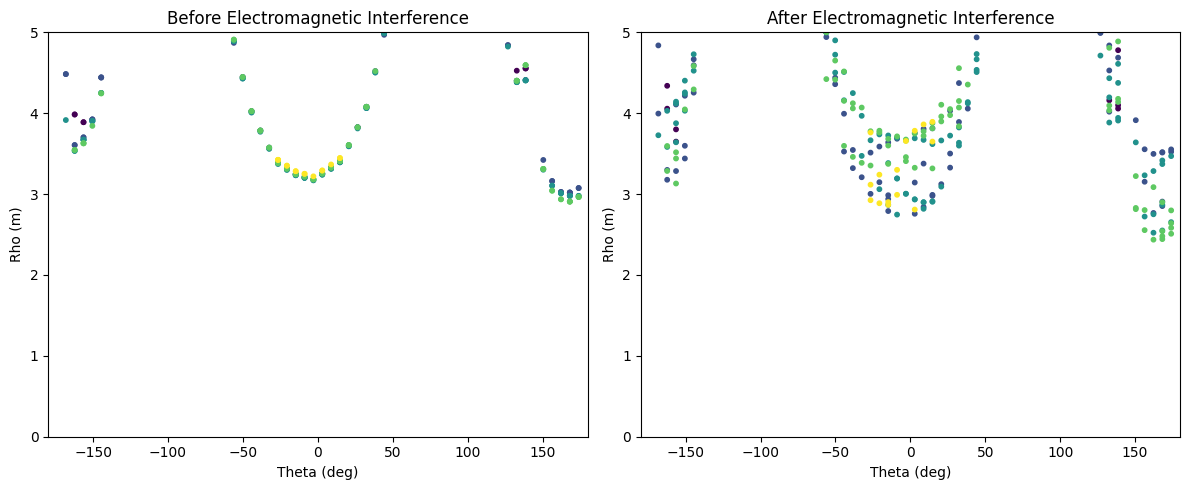

In [48]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Before interference
axs[0].scatter(sph_point_cloud[:, 1], sph_point_cloud[:, 0], c=sph_point_cloud[:, 2], cmap='viridis', s=10)
axs[0].set_title('Before Electromagnetic Interference')
axs[0].set_xlabel('Theta (deg)')
axs[0].set_ylabel('Rho (m)')
axs[0].set_xlim([-180, 180])
axs[0].set_ylim([0, 5])

# After interference
axs[1].scatter(sph_point_cloud_interfered[:, 1], sph_point_cloud_interfered[:, 0], c=sph_point_cloud_interfered[:, 2], cmap='viridis', s=10)
axs[1].set_title('After Electromagnetic Interference')
axs[1].set_xlabel('Theta (deg)')
axs[1].set_ylabel('Rho (m)')
axs[1].set_xlim([-180, 180])
axs[1].set_ylim([0, 5])

plt.tight_layout()
plt.show()